## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [146]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# Set the seed
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [147]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [148]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [149]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [150]:
len(df.query("converted == 1"))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [151]:
len(df.query("group == 'treatment' & landing_page != 'new_page'")) + len(df.query("landing_page == 'new_page' & group != 'treatment'"))

3893

f. Do any of the rows have missing values?

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No, there are no rows with missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [153]:
index_names_cond1 = df[(df["group"] == "treatment") & (df["landing_page"] == "old_page")].index
index_names_cond2 = df[(df["group"] == "control") & (df["landing_page"] == "new_page")].index
df2 = df.drop(index_names_cond1)
df2.drop(index_names_cond2, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [154]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [155]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [156]:
df2["user_id"].value_counts().head()  # show number of entries for each user_id (first 5)

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

In [157]:
# Show information for that particular user 
df2[df2["user_id"] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

Index = 1899, User_id = 773192, Group =  treatment, Landing page = new_page, Converted = 0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [158]:
df2.drop(2893, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [159]:
len(df2.query("converted == 1")) / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [160]:
len(df2.query("converted == 1  & group == 'control'")) / len(df2.query("group == 'control'"))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [161]:
len(df2.query("converted == 1  & group == 'treatment'")) / len(df2.query("group == 'treatment'"))

0.11880806551510564

d. What is the probability that an individual received the new page?

In [162]:
len(df2.query("landing_page == 'new_page'")) / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

No, I don't think there's sufficient evidence to conclude that the new treatment page leads to more conversions, since the proportion of conversion in both groups (treatment and control) is very similar (around 12%).

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: $p_{old} \ge p_{new}$

$H_{1}$: $p_{old} < p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [163]:
p_new = len(df2.query('converted == "1"'))/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [164]:
p_old = len(df2.query('converted == "1"'))/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [165]:
n_new = df2['group'].value_counts()['treatment']
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [166]:
n_old = df2['group'].value_counts()['control']
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [167]:
new_page_converted = np.random.binomial(n_new,p_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [168]:
old_page_converted = np.random.binomial(n_old,p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [169]:
diff = (new_page_converted/n_new) - (old_page_converted/n_old)
diff

0.0010783929648057883

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [170]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'Counts')

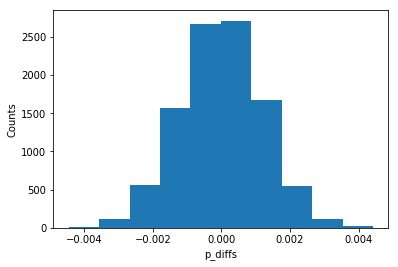

In [171]:
plt.hist(np.array(p_diffs))
plt.xlabel('p_diffs')
plt.ylabel('Counts')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [172]:
obs_diff = df2[df2['group']=='treatment']['converted'].mean()-df2[df2['group']=='control']['converted'].mean()
obs_diff

-0.0015782389853555567

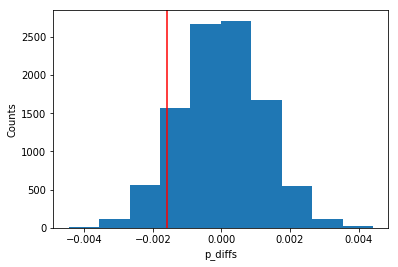

In [173]:
plt.hist(np.array(p_diffs))
plt.xlabel('p_diffs')
plt.ylabel('Counts')
plt.axvline(x= obs_diff, color='r');

In [174]:
(np.array(p_diffs) > obs_diff).mean()

0.90459999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value computed in part **j** is called the p-value. As we've learned in the course, this value represents a measurement of how likely it is that the data ocurred under the null hypothesis. If the p-value is small enough (typically less than $\alpha$, the Type I error rate, in this case $\alpha = 0.05$), we say there is statistical evidence to reject the null hypothesis. In this case, we created a distribution assuming $p_{old} = p_{new}$, so the differences are centered around 0. But our observed difference (coming from the actual data) is not zero and in fact, a large proportion of the p_diffs distribution lies on the right side of the observed difference. Thus, the calculated p-value in this case is quite large, meaning we couldn't simply reject the null. There is not enough evidence that the conversion rates of the new and old pages are different. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [175]:
import statsmodels.api as sm

convert_old = len(df2.query("group == 'control' & converted == 1"))
convert_new = len(df2.query("group == 'treatment' & converted == 1"))
n_old = len(df2.query("landing_page == 'old_page'"))
n_new =  len(df2.query("landing_page == 'new_page'"))

print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [176]:
from statsmodels.stats.proportion import proportions_ztest

counts = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
zscore, pval = proportions_ztest(counts, nobs, alternative="smaller")
print('{0:0.3f}'.format(pval))
print('{0:0.3f}'.format(zscore))

0.905
1.311


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value obtained agrees with the findings in parts **j.** and **k.**, so there is no enough evidence to reject the null hypothesis. 

The z-score shows how many standard deviations away the observed difference is to the center of the difference distribution. This value can be compared to critical values of the standard normal distribution to determine whether to reject the null hypothesis. For a one-sided test, the critical value is the percent point function of $1-\alpha$. If the absolute value of the z-score is greater than the critical value, the null hypothesis can be rejected; if the absolute value of the z-score is less than the critical value, there is no evidence to reject the null hypothesis. [Source: https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistics/basic-statistics/how-to/1-sample-z/interpret-the-results/all-statistics-and-graphs/#z-value.]

In our case:

In [177]:
from scipy.stats import norm
print(norm.ppf(1-(0.05))) # Critical value for one-sided test at 95% confidence level 

1.64485362695


Here we see that the z-score of 1.311 is less than the critical value of 1.6449, which means we can't reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The type of regression should be logistic. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [178]:
df2["intercept"] = 1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [179]:
import statsmodels.api as sm
log_model = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [180]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-07-24 10:26 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with **ab_page** is 0.1899. The difference lies in the fact that in **Part II** we performed a one-sided test while the regression model carries out a two-sided test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Even though there may be other factors that might influence whether or not an individual converts (such  as age, education level, employment status, etc.), we have to be careful as to which ones to choose as relevant, so that they don't lead to unreliable results. It may happen that significant bivariant relationships are not  significant in multiple regression.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [181]:
df_countries = pd.read_csv("countries.csv")
df_total = df_countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df_total.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [182]:
df_total["country"].value_counts()  # check which values exist for "country"

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [183]:
# Create dummy columns
df_total[['CA','UK','US']] = pd.get_dummies(df_total['country'])
df_total.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [184]:
# Fit model for countries and ab_page
log_mod_countries = sm.Logit(df_total['converted'], df_total[['intercept','CA','UK','ab_page']])
results = log_mod_countries.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-07-24 10:26 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

We see that the p-values for Canada and UK are 0.1295 and 0.4573 respectively, which suggests that we fail again to reject the null hypothesis, meaning that there is no significant evidence to consider that the user country has an impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [185]:
# Create the necessary additional columns
df_total['CA_ab_page'] = df_total['CA'] * df_total['ab_page']
df_total['UK_ab_page'] = df_total['UK'] * df_total['ab_page']
df_total.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US,CA_ab_page,UK_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1


In [186]:
# Fit model considering interaction terms
log_mod_total = sm.Logit(df_total['converted'], df_total[['intercept', 'CA','UK', 'ab_page','CA_ab_page','UK_ab_page']])
results = log_mod_total.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [187]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-07-24 10:27 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA_ab_page   -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_ab_page    0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

Here we observe again that the **p-values** obtained for all our new variables are higher than $\alpha$, suggesting that the interactions between page type and country have no significant effects on conversion.

### Conclusions

As we could observe in all tests performed, there is no statistical evidence to reject the null hypothesis. Therefore, we cannot confirm that the conversion rate of the new page is better than the conversion rate of the old page.

In [188]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0